In [1]:
import math
import torch
import gpytorch
import numpy as np
import numpy.linalg as linalg

import spectralgp
from spectralgp.samplers import AlternatingSampler
from spectralgp.models import ExactGPModel, SpectralModel, ProductKernelSpectralModel
from spectralgp.sampling_factories import ss_factory, ess_factory

import argparse

import sys
import matplotlib.pyplot as plt

import traceback

torch.set_default_dtype(torch.float64)

In [2]:

nomg = 100
ess_iters = 10
optim_iters = 5 
iters = 50
torch.random.manual_seed(42)


In [3]:
data_x = torch.linspace(0, 5, 500)
# True function is sin(2*pi*x) with Gaussian noise
data_y = (0. + torch.sin(data_x * (2 * math.pi))) + torch.randn(data_x.size()) * 0.01
in_dims = 1

In [4]:
omega_0 = 1.e-10
omega_max = 8.
omega_data = torch.linspace(omega_0, omega_max, nomg)
omega_delta = omega_data[1] - omega_data[0]
phi_const = torch.sqrt(omega_delta/2.)

In [5]:
mapped_data_x = []
for obs_id in range(data_x.size(0)):
    mapped_data_x.append([])
    for omg_id in range(0, nomg):
        if omg_id == 0 or omg_id == nomg-1:
            mapped_data_x[obs_id].append(torch.cos(2.0*math.pi*omega_data[omg_id]*data_x[obs_id]))
            mapped_data_x[obs_id].append(torch.sin(2.0*math.pi*omega_data[omg_id]*data_x[obs_id]))
        else:
            mapped_data_x[obs_id].append(math.sqrt(2.0)*torch.cos(2.0*math.pi*omega_data[omg_id]*data_x[obs_id]))
            mapped_data_x[obs_id].append(math.sqrt(2.0)*torch.sin(2.0*math.pi*omega_data[omg_id]*data_x[obs_id]))

data_x = torch.DoubleTensor(mapped_data_x) * phi_const

In [6]:
train_x = data_x[0:150,:]
train_y = data_y[0:150]

test_x = data_x[150:,:]
test_y = data_y[150:]

print(train_x.size(), train_y.size())
print(test_x.size(), test_y.size())

torch.Size([150, 200]) torch.Size([150])
torch.Size([350, 200]) torch.Size([350])


In [7]:
data_mod = spectralgp.models.BayesianLinearRegressionModel(train_x, train_y, nomg, omega_0, omega_max)

################################
## set up alternating sampler ##
################################

alt_sampler = spectralgp.samplers.AlternatingSampler(
[data_mod],
spectralgp.sampling_factories.ss_factory, [spectralgp.sampling_factories.ess_factory],
totalSamples=iters, numInnerSamples=ess_iters, numOuterSamples=optim_iters, num_dims=in_dims
)
alt_sampler.run()

noise tensor([[1.4744]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([0.])
latent_mod.mean_module.constant tensor([0.])
latent_mod.mean_module.lengthscale tensor([-0.3000])
latent_mod.covar_module.raw_outputscale tensor(0.)
latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[0.]])
Loss is:  tensor(-7.7555, grad_fn=<AddBackward0>)
Loss is:  tensor(-7.7160, grad_fn=<AddBackward0>)
Loss is:  tensor(-7.6777, grad_fn=<AddBackward0>)
Loss is:  tensor(-7.6393, grad_fn=<AddBackward0>)
Loss is:  tensor(-7.6016, grad_fn=<AddBackward0>)
Task: 0 ; Iteration 0
Seconds for Iteration 0 : 0.5737106800079346
noise tensor([[1.5244]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.0500])
latent_mod.mean_module.constant tensor([-0.0126])
latent_mod.mean_module.lengthscale tensor([-0.2964])
latent_mod.covar_module.raw_outputscale tensor(-0.0486)
latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[0.0499]])


Seconds for Iteration 12 : 0.44292473793029785
noise tensor([[0.9244]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.3423])
latent_mod.mean_module.constant tensor([-0.6027])
latent_mod.mean_module.lengthscale tensor([-0.1654])
latent_mod.covar_module.raw_outputscale tensor(0.5415)
latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[0.4457]])
Loss is:  tensor(-2.0418, grad_fn=<AddBackward0>)
Loss is:  tensor(-2.0364, grad_fn=<AddBackward0>)
Loss is:  tensor(-2.0319, grad_fn=<AddBackward0>)
Loss is:  tensor(-2.0272, grad_fn=<AddBackward0>)
Loss is:  tensor(-2.0223, grad_fn=<AddBackward0>)
Task: 0 ; Iteration 13
Seconds for Iteration 13 : 0.3198862075805664
noise tensor([[0.8743]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.2925])
latent_mod.mean_module.constant tensor([-0.6522])
latent_mod.mean_module.lengthscale tensor([-0.1756])
latent_mod.covar_module.raw_outputscale tensor(0.5913)
laten

Seconds for Iteration 25 : 0.5372052192687988
noise tensor([[0.2740]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.0772])
latent_mod.mean_module.constant tensor([-1.2473])
latent_mod.mean_module.lengthscale tensor([-0.2969])
latent_mod.covar_module.raw_outputscale tensor(1.1887)
latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[-0.1960]])
Loss is:  tensor(-1.5046, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.4941, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.4832, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.4725, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.4620, grad_fn=<AddBackward0>)
Task: 0 ; Iteration 26
Seconds for Iteration 26 : 0.49254393577575684
noise tensor([[0.2240]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.1269])
latent_mod.mean_module.constant tensor([-1.2972])
latent_mod.mean_module.lengthscale tensor([-0.2951])
latent_mod.covar_module.raw_outputscale tensor(1.2386)
late

Seconds for Iteration 38 : 0.5093851089477539
noise tensor([[0.1027]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.1498])
latent_mod.mean_module.constant tensor([-1.8956])
latent_mod.mean_module.lengthscale tensor([-0.2304])
latent_mod.covar_module.raw_outputscale tensor(1.8370)
latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[-0.7493]])
Loss is:  tensor(-1.3542, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.3554, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.3524, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.3518, grad_fn=<AddBackward0>)
Loss is:  tensor(-1.3518, grad_fn=<AddBackward0>)
Task: 0 ; Iteration 39
Seconds for Iteration 39 : 0.484513521194458
noise tensor([[0.1100]])
likelihood.noise_covar.raw_noise tensor([0.])
latent_lh.noise_covar.raw_noise tensor([-0.1048])
latent_mod.mean_module.constant tensor([-1.9457])
latent_mod.mean_module.lengthscale tensor([-0.2231])
latent_mod.covar_module.raw_outputscale tensor(1.8869)
latent

Test RMSE: 0.7423464289312427


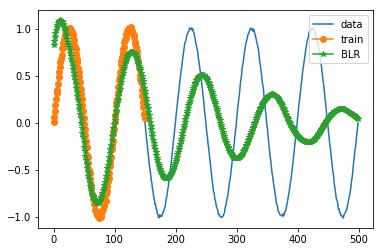

<Figure size 432x288 with 0 Axes>

In [8]:
data_mod.set_train_data(inputs=test_x, targets=None, strict=False)

d = data_mod(test_x).mean - test_y

test_rmse = torch.sqrt(torch.mean(torch.pow(d, 2)))

print("Test RMSE: {}".format(test_rmse))

data_mod.set_train_data(inputs=data_x, targets=None, strict=False)

plt.plot(data_y.numpy(), label='data')
plt.plot(train_y.numpy(), marker='o', label='train')
plt.plot(data_mod(data_x).mean.detach().numpy(), marker='*', label='BLR')
plt.legend()
plt.show()
plt.savefig("BLR_out.png")

#print(data_mod(data_x).mean.detach().numpy())